## T-test

A t-test is a statistical hypothesis test that uses the **t-distribution** to determine whether there is a significant difference between means.

The t-test is structured similarly to the Z-test, but **uses the sample variance** $s^2$ in place of population variance (more likely in practical cases). The t-test is parameterized by the degrees of freedom, which refers to the number of independent observations in a dataset, denoted below by $n-1$.

$$t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}\sim t_{n-1}$$

where $\displaystyle s^2=\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}$, the sample standard deviation.

### When to use t-test

- Sample size is small (n < 30)
- Population standard deviation is unknown
- Data is approximately normally distributed
- Comparing means

❌ Don't use when:
- Data is heavily skewed or has outliers
- Sample size is very large (use z-test instead)
- Comparing more than two groups (use ANOVA)


### Choosing between different t-tests

| Test Type | Use Case | Key Assumption |
|-----------|----------|----------------|
| **One-sample** | Compare sample mean to known value | Normal distribution |
| **Independent** | Compare two separate groups | Equal variances + independence |
| **Welch's** | Compare two groups (unequal variances) | Independence only |
| **Paired** | Compare same subjects at two times | Paired observations |

```txt
                 Same subjects?
                         │
                    ┌────┴────────┐
                   YES            NO
                    │             │
              Paired t-test   Independent groups?
                                  │
                             ┌────┴────┐
                        Equal vars?   One group vs constant?
                             │              │
                   ┌─────────┴────┐    One-sample t-test
                   YES            NO
                   │              │
          Independent t-test   Welch's t-test
```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(326)

## t-test variations

### One-Sample t-test

- **Purpose**: Compare sample mean to a known population mean
- *Use case*: "Is our average response time different from the industry standard?"
$$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$

#### One-Sample t-test Example

📊 Customer Satisfaction Analysis
Sample size: 25
Sample mean: 7.02
Sample std: 1.09
Target satisfaction: 7.0


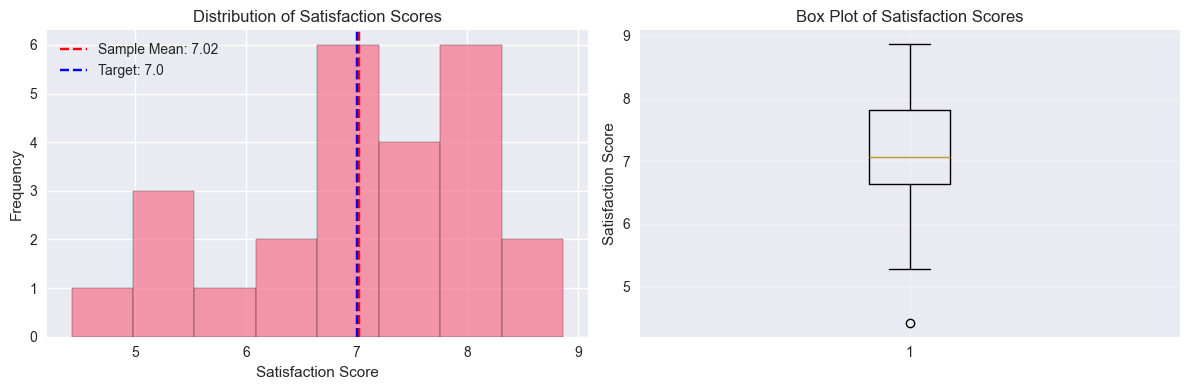

In [3]:
# Scenario: Testing if average customer satisfaction score differs from 7.0
# H0: μ = 7.0 (no difference from target satisfaction)
# H1: μ ≠ 7.0 (significant difference from target)

# Generate sample data
satisfaction_scores = np.random.normal(loc=7.3, scale=1.2, size=25)

print("📊 Customer Satisfaction Analysis")
print(f"Sample size: {len(satisfaction_scores)}")
print(f"Sample mean: {satisfaction_scores.mean():.2f}")
print(f"Sample std: {satisfaction_scores.std(ddof=1):.2f}")
print(f"Target satisfaction: 7.0")

# Visualize the data
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(satisfaction_scores, bins=8, alpha=0.7, edgecolor='black')
plt.axvline(satisfaction_scores.mean(), color='red', linestyle='--', label=f'Sample Mean: {satisfaction_scores.mean():.2f}')
plt.axvline(7.0, color='blue', linestyle='--', label='Target: 7.0')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Scores')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(satisfaction_scores)
plt.ylabel('Satisfaction Score')
plt.title('Box Plot of Satisfaction Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [4]:
# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(satisfaction_scores, 7.0)

print("\n🔍 One-Sample t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {len(satisfaction_scores) - 1}")


🔍 One-Sample t-test Results:
t-statistic: 0.0853
p-value: 0.9327
Degrees of freedom: 24


In [5]:
# Interpret results
alpha = 0.05 # Significance level
if p_value < alpha:
    print(f"✅ Result: REJECT null hypothesis (p < {alpha})")
    print("   The satisfaction score significantly differs from 7.0")
else:
    print(f"❌ Result: FAIL TO REJECT null hypothesis (p >= {alpha})")
    print("   No significant difference from target satisfaction of 7.0")

❌ Result: FAIL TO REJECT null hypothesis (p >= 0.05)
   No significant difference from target satisfaction of 7.0


### Independent Two-Sample t-test

- **Purpose**: Compare means of two independent groups
- *Use case*: "Do males and females have different average incomes?"
- **Assumptions**: 
  - Independent samples
  - Normal distribution
  - **Equal variances** (homoscedasticity / homogeneity of variance)

Scenario: Comparing average sales between two store locations
Store A: Mean = $1238.19, Std = $178.14, n = 28
Store B: Mean = $1090.75, Std = $185.34, n = 23


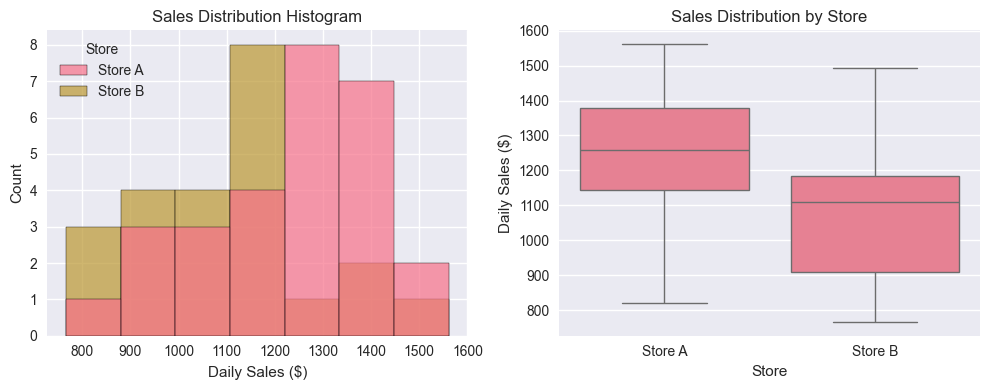

In [72]:
print("Scenario: Comparing average sales between two store locations")
print("=" * 60)

# Generate data for two independent stores
np.random.seed(326)
store_a_sales = np.random.normal(loc=1300, scale=200, size=28)  # Store A
store_b_sales = np.random.normal(loc=1100, scale=180, size=23)  # Store B

# Create DataFrame for better visualization
sales_data = pd.DataFrame({
    'Sales': np.concatenate([store_a_sales, store_b_sales]),
    'Store': ['Store A'] * len(store_a_sales) + ['Store B'] * len(store_b_sales)
})

print(f"Store A: Mean = ${store_a_sales.mean():.2f}, Std = ${store_a_sales.std():.2f}, n = {len(store_a_sales)}")
print(f"Store B: Mean = ${store_b_sales.mean():.2f}, Std = ${store_b_sales.std():.2f}, n = {len(store_b_sales)}")

# Visualize the comparison
plt.figure(figsize=(10, 4))

# Histogram for distribution
plt.subplot(1, 2, 1)
sns.histplot(data=sales_data, x='Sales', hue='Store', alpha=0.7)
plt.title('Sales Distribution Histogram')
plt.xlabel('Daily Sales ($)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=sales_data, x='Store', y='Sales')
plt.title('Sales Distribution by Store')
plt.ylabel('Daily Sales ($)')

plt.tight_layout()
plt.show()

In [73]:
# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(store_a_sales, store_b_sales)
print(f"\nLevene's Test for Equal Variances:")
print("=" * 60)
print(f"Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")

equal_var = levene_p > 0.05
print(f"Equal variances assumption: {'✅ Met' if equal_var else '❌ Violated'}")


Levene's Test for Equal Variances:
Statistic: 0.0039, p-value: 0.9504
Equal variances assumption: ✅ Met


In [74]:
# Perform independent t-test
t_stat, p_value = stats.ttest_ind(store_a_sales, store_b_sales, equal_var=equal_var)

print(f"\nIndependent t-test Results:")
print("=" * 60)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant difference between store sales")
else:
    print("❌ No significant difference between store sales")


Independent t-test Results:
t-statistic: 2.8306
p-value: 0.0067
✅ Significant difference between store sales


### Welch's t-test (Unequal variance)

- **Purpose**: Compare means when variances are unequal
- *Use case*: Same as independent t-test but without equal variance assumption
- **Advantage**: More robust when sample sizes or variances differ

Scenario: Comparing average sales between two store locations
Store A: Mean = $1729.25, Std = $531.56, n = 25
Store B: Mean = $1487.78, Std = $205.46, n = 22


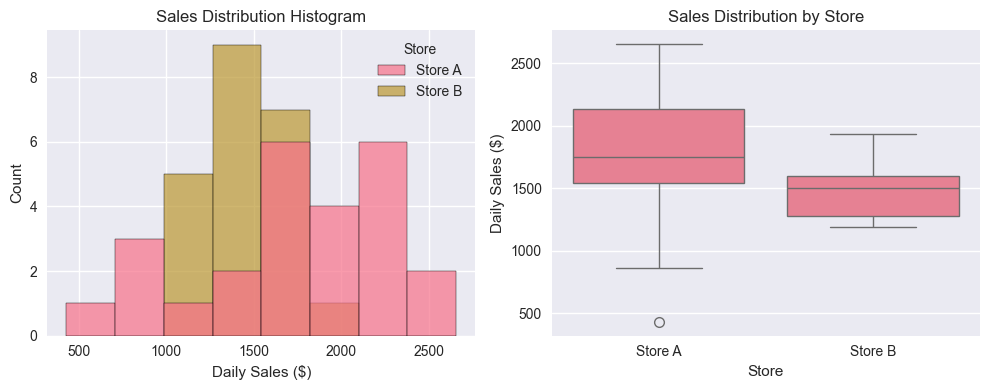

In [75]:
print("Scenario: Comparing average sales between two store locations")
print("=" * 60)

# Generate data for two independent stores
np.random.seed(326)
store_a_sales = np.random.normal(loc=1870, scale=600, size=25)  # Store A
store_b_sales = np.random.normal(loc=1500, scale=200, size=22)  # Store B

# Create DataFrame for better visualization
sales_data = pd.DataFrame({
    'Sales': np.concatenate([store_a_sales, store_b_sales]),
    'Store': ['Store A'] * len(store_a_sales) + ['Store B'] * len(store_b_sales)
})

print(f"Store A: Mean = ${store_a_sales.mean():.2f}, Std = ${store_a_sales.std():.2f}, n = {len(store_a_sales)}")
print(f"Store B: Mean = ${store_b_sales.mean():.2f}, Std = ${store_b_sales.std():.2f}, n = {len(store_b_sales)}")

# Visualize the comparison
plt.figure(figsize=(10, 4))

# Histogram for distribution
plt.subplot(1, 2, 1)
sns.histplot(data=sales_data, x='Sales', hue='Store', alpha=0.7)
plt.title('Sales Distribution Histogram')
plt.xlabel('Daily Sales ($)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=sales_data, x='Store', y='Sales')
plt.title('Sales Distribution by Store')
plt.ylabel('Daily Sales ($)')

plt.tight_layout()
plt.show()

In [76]:
# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(store_a_sales, store_b_sales)
print(f"\nLevene's Test for Equal Variances:")
print("=" * 60)
print(f"Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")

equal_var = levene_p > 0.05
print(f"Equal variances assumption: {'✅ Met' if equal_var else '❌ Violated'}")


Levene's Test for Equal Variances:
Statistic: 10.9209, p-value: 0.0019
Equal variances assumption: ❌ Violated


In [77]:
# Perform independent t-test
t_stat_equal, p_value_equal = stats.ttest_ind(store_a_sales, store_b_sales, equal_var=True)
print(f"Standard t-test: t = {t_stat_equal:.4f}, p = {p_value_equal:.4f}")

# Welch's t-test (unequal variances)
t_stat_welch, p_value_welch = stats.ttest_ind(store_a_sales, store_b_sales, equal_var=False)
print(f"Welch's t-test:  t = {t_stat_welch:.4f}, p = {p_value_welch:.4f}")

Standard t-test: t = 1.9600, p = 0.0562
Welch's t-test:  t = 2.0568, p = 0.0480


> [!IMPORTANT]
> Incorrect test may lead to different conclusion!

### Paired t-test

- **Purpose**: Compare means of the same subjects at two time points
- **Use case**: "Did the training program improve employee performance?"

Scenario: Before/After weight loss program effectiveness
Participants: 30
Before: Mean = 171.02 lbs, Std = 22.02
After:  Mean = 165.09 lbs, Std = 21.16
Mean weight loss: 5.93 lbs


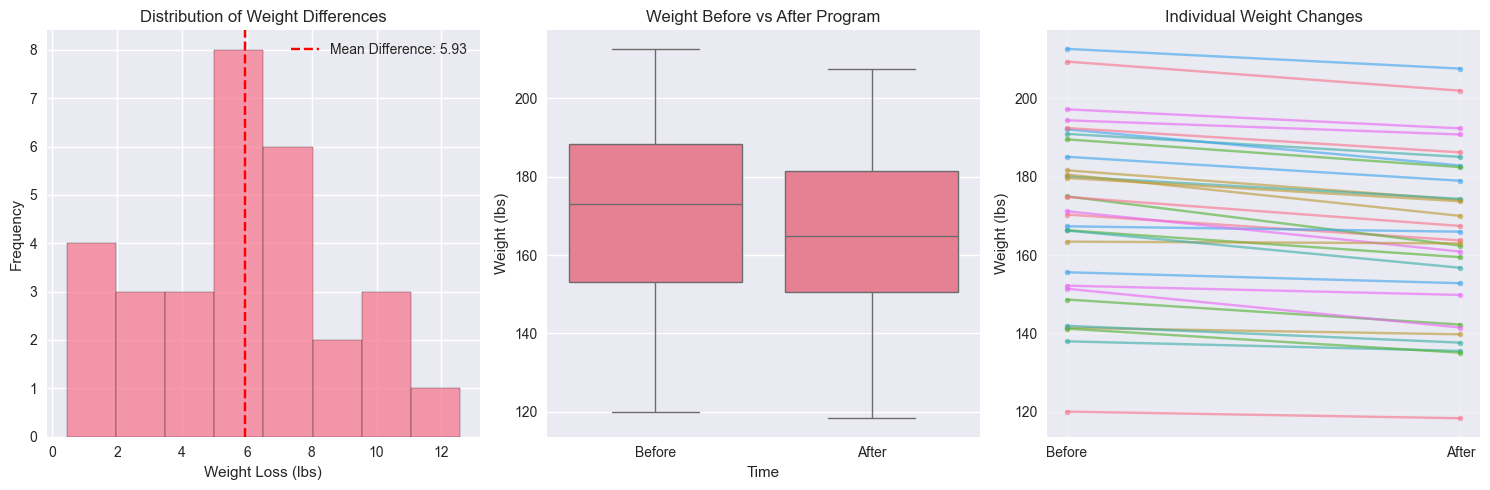

In [ ]:
print("Scenario: Before/After weight loss program effectiveness")
print("=" * 60)

# Generate paired data (same individuals before/after)
np.random.seed(326)
n_participants = 30
participant_ids = range(1, n_participants + 1)

# Before weights (baseline)
before_weights = np.random.normal(loc=180, scale=25, size=n_participants)

# After weights (with some weight loss + individual variation)
weight_loss = np.random.normal(loc=6, scale=3, size=n_participants)  # Average 6 lbs loss
after_weights = before_weights - weight_loss

# Create paired DataFrame
weight_data = pd.DataFrame({
    'Participant': list(participant_ids) * 2,
    'Weight': np.concatenate([before_weights, after_weights]),
    'Time': ['Before'] * n_participants + ['After'] * n_participants
})

# Calculate differences
weight_differences = before_weights - after_weights

print(f"Participants: {n_participants}")
print(f"Before: Mean = {before_weights.mean():.2f} lbs, Std = {before_weights.std():.2f}")
print(f"After:  Mean = {after_weights.mean():.2f} lbs, Std = {after_weights.std():.2f}")
print(f"Mean weight loss: {weight_differences.mean():.2f} lbs")

# Visualize paired data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(weight_differences, bins=8, alpha=0.7, edgecolor='black')
plt.axvline(weight_differences.mean(), color='red', linestyle='--', 
           label=f'Mean Difference: {weight_differences.mean():.2f}')
plt.xlabel('Weight Loss (lbs)')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Differences')
plt.legend()

plt.subplot(1, 3, 2)
sns.boxplot(data=weight_data, x='Time', y='Weight')
plt.title('Weight Before vs After Program')
plt.ylabel('Weight (lbs)')

plt.subplot(1, 3, 3)
# Connect paired observations
for i in range(n_participants):
    plt.plot([0, 1], [before_weights[i], after_weights[i]], 'o-', alpha=0.6, markersize=4)
plt.xticks([0, 1], ['Before', 'After'])
plt.ylabel('Weight (lbs)')
plt.title('Individual Weight Changes')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [82]:
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(before_weights, after_weights)

print(f"\n Paired t-test Results:")
print("=" * 60)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {n_participants - 1}")

if p_value < 0.05:
    print("✅ Significant weight loss occurred")
    print(f"   Average weight loss: {weight_differences.mean():.2f} ± {weight_differences.std():.2f} lbs")
else:
    print("❌ No significant weight loss detected")


 Paired t-test Results:
t-statistic: 10.7412
p-value: 0.0000
Degrees of freedom: 29
✅ Significant weight loss occurred
   Average weight loss: 5.93 ± 2.98 lbs


In [83]:
# Compare with incorrect independent t-test
t_stat_wrong, p_value_wrong = stats.ttest_ind(before_weights, after_weights)
print(f"\n⚠️  Comparison with INCORRECT independent t-test:")
print(f"Independent t-test: t = {t_stat_wrong:.4f}, p = {p_value_wrong:.4f}")


⚠️  Comparison with INCORRECT independent t-test:
Independent t-test: t = 1.0463, p = 0.2998


> [!IMPORTANT]
> Incorrect test ignores the pairing and reduces statistical power!